# Emotion Detection of Text (Emotion Classification of Text)
## Text Classification
## Sentiment Analysis

In [1]:
# Laod packages
import pandas as pd
import numpy as np


In [2]:
# Load data Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install neattext

In [4]:
# Text Cleaning
import neattext.functions as nfx

In [5]:
# Load Dataset
df = pd.read_csv("emotion_dataset_2.csv")

In [6]:
# preview Dataset
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [7]:
df.drop(columns=['Unnamed: 0','Clean_Text'],inplace = True)

In [8]:
#Shape
df.shape

(34792, 2)

In [9]:
# Datatypes
df.dtypes

Emotion    object
Text       object
dtype: object

In [10]:
# Check missing values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [11]:
# Value of Emotions count
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

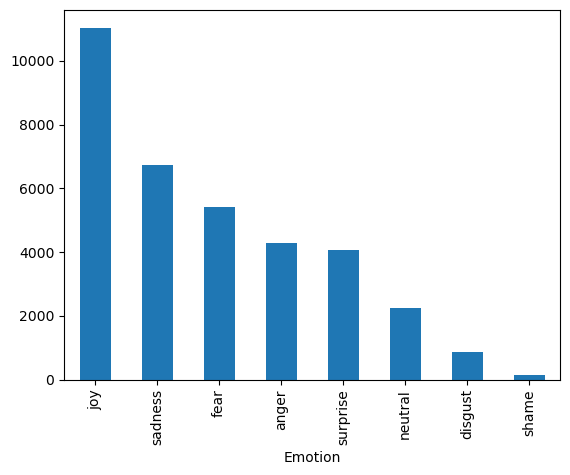

In [12]:
# Value of Emotions count
df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='Emotion'>

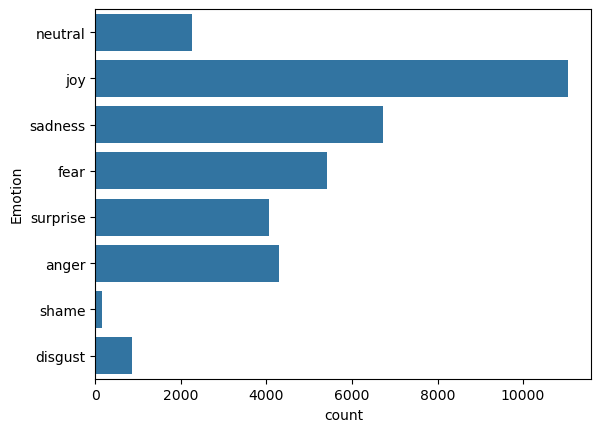

In [13]:
# Using seaborn to plot
# Old method
sns.countplot(df['Emotion']) 

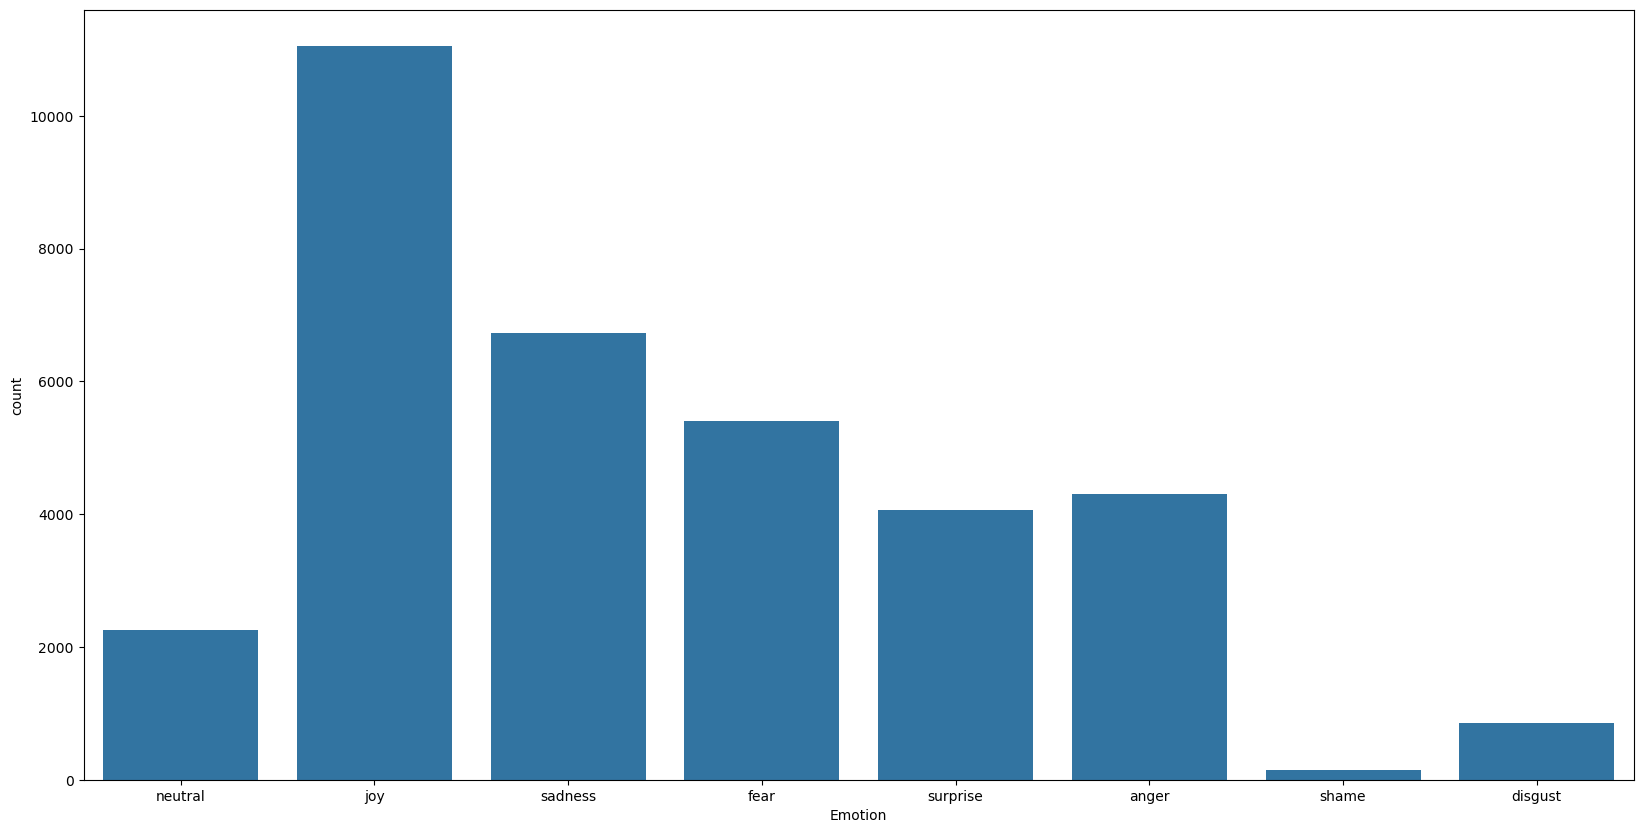

In [14]:
# new method
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

### Exploration
+ Text Cleaning
+ Sentimental Analysis
+ Keyword Extraction
  - Keywords for each emotion
   - Wordcloud

In [15]:
!pip install textblob


In [16]:
# Sentiment Analysis
from textblob import TextBlob

In [17]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"  # Fixed: Properly indented this line
    elif sentiment < 0:
        result = "Negative"  # Fixed: Properly indented this line
    else:
        result = "Neutral"   # Fixed: Properly indented this line
    return result  # Fixed: Properly aligned with function definition

In [18]:
# Test Fxn
get_sentiment("I love coding")

'Positive'

In [19]:
df["Sentiment"] = df["Text"].apply(get_sentiment)

In [20]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [21]:
# Compare our Emotion by sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1535
          Neutral      1843
          Positive     2032
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1546
          Positive     1893
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

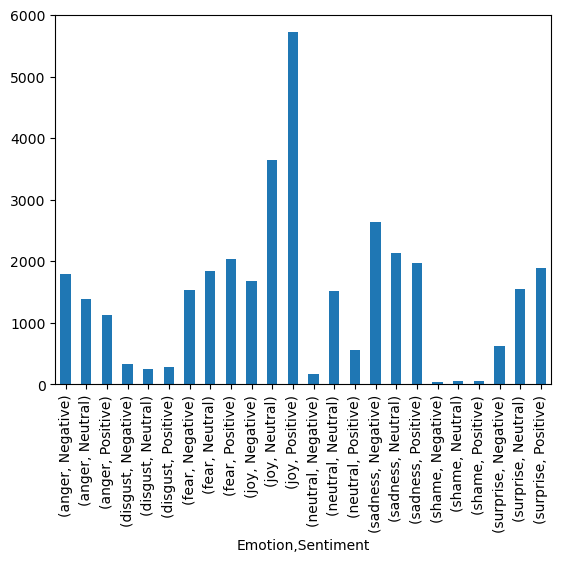

In [22]:
# First Method : Using Matplotlib
# Compare our Emotion by sentiment
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [23]:
# Using seaborn
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)>

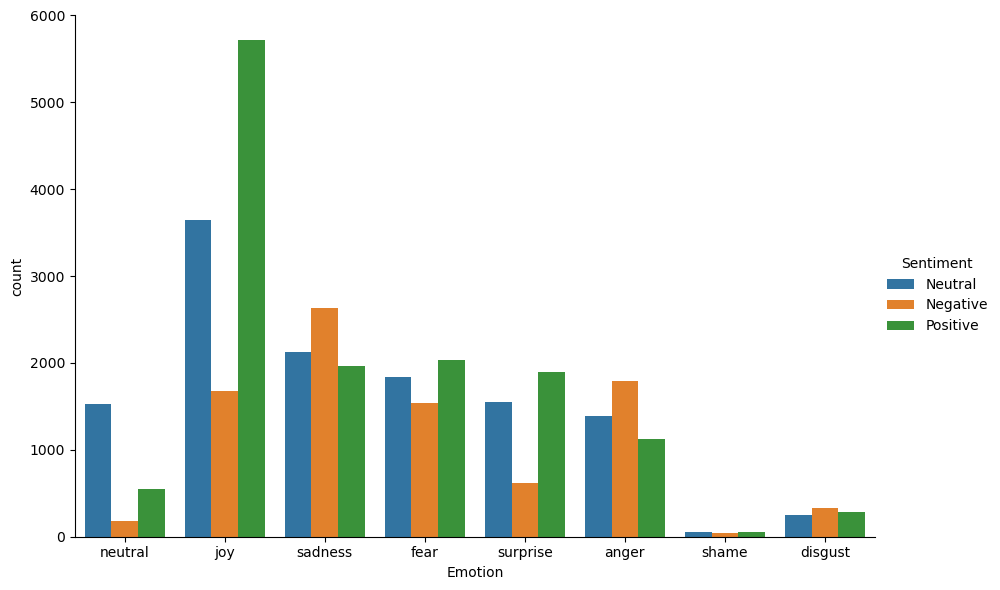

In [24]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',height=6,aspect=1.5)

### Text Cleaning
+ Remove noise
  - stopwords
  - specialchracters
  - punctuations
  - emojis

In [25]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [26]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [27]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [28]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [29]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emojis)

In [30]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,Why
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz for u babe naamazed nga ...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,have you gift Hope you like it Its hand made...
34788,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,A man robbed me today .,A man robbed me today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of #Losing YOU


### keyword Extraction
+ Extract most commonest words per class of emotion


In [31]:
from collections import Counter

In [32]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [33]:
## list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [34]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [35]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [36]:
# joy document
joy_docx = ' '.join(joy_list)

In [37]:
joy_docx

'Sage Act upgrade on my to do list for tommorow  Such an eye  The true hazel eyeand so brilliant  Regular features  open countenance  with a complexion  Oh  What a bloom of full health  and such a pretty height and size  such a firm and upright figure  There is health  not merely in her bloom  but in her air  her head  her glance  One hears sometimes of a child being  the picture of health   now  she always gives me the idea of being the complete picture of grownup health  She is loveliness itself     ugh babe hugggzzz for u   babe naamazed nga ako e babe e despite negas mas pinaramdam at fil ko ang  For once in his life  Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition   I have a feeling i will fail french #fuckfrench  GoodLet  s go now   When I fell in love with \\X\\  Overnight I felt confidence selfesteem    responsible and worthwhile One could get terribly ecstatic but that would be a dangerous thing to do   Whe

In [38]:
# Extract keywords
keyword_joy = extract_keywords(joy_docx)

In [39]:
keyword_joy

{'the': 5300,
 'to': 4744,
 'I': 4471,
 'a': 3595,
 'and': 3221,
 'of': 2803,
 'my': 2793,
 'in': 2329,
 'for': 1999,
 'is': 1590,
 'with': 1375,
 'you': 1283,
 'that': 1234,
 'was': 1155,
 'me': 1144,
 'at': 1124,
 'on': 1120,
 'it': 1012,
 'have': 962,
 'be': 890,
 'this': 784,
 'day': 731,
 'amp': 678,
 'up': 658,
 'had': 639,
 'all': 636,
 'so': 603,
 'time': 602,
 'Im': 555,
 'when': 544,
 'your': 528,
 'When': 520,
 'The': 516,
 'work': 509,
 'from': 481,
 'not': 480,
 'get': 479,
 'like': 476,
 'an': 473,
 'today': 472,
 'tomorrow': 468,
 'Christmas': 453,
 'out': 453,
 'just': 452,
 'about': 450,
 'now': 442,
 'are': 438,
 'but': 402,
 'love': 393,
 'i': 387}

In [40]:
# plot
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    df_01['hue'] = df_01['token']  # Add a 'hue' column for coloring   
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} Most Common Keywords".format(emotion_name))
    colors = sns.color_palette('husl', len(df_01))
    sns.barplot(x='token',y='count',hue='hue', data=df_01, palette='husl', legend=False)
    plt.xticks(rotation=45)
    plt.show()

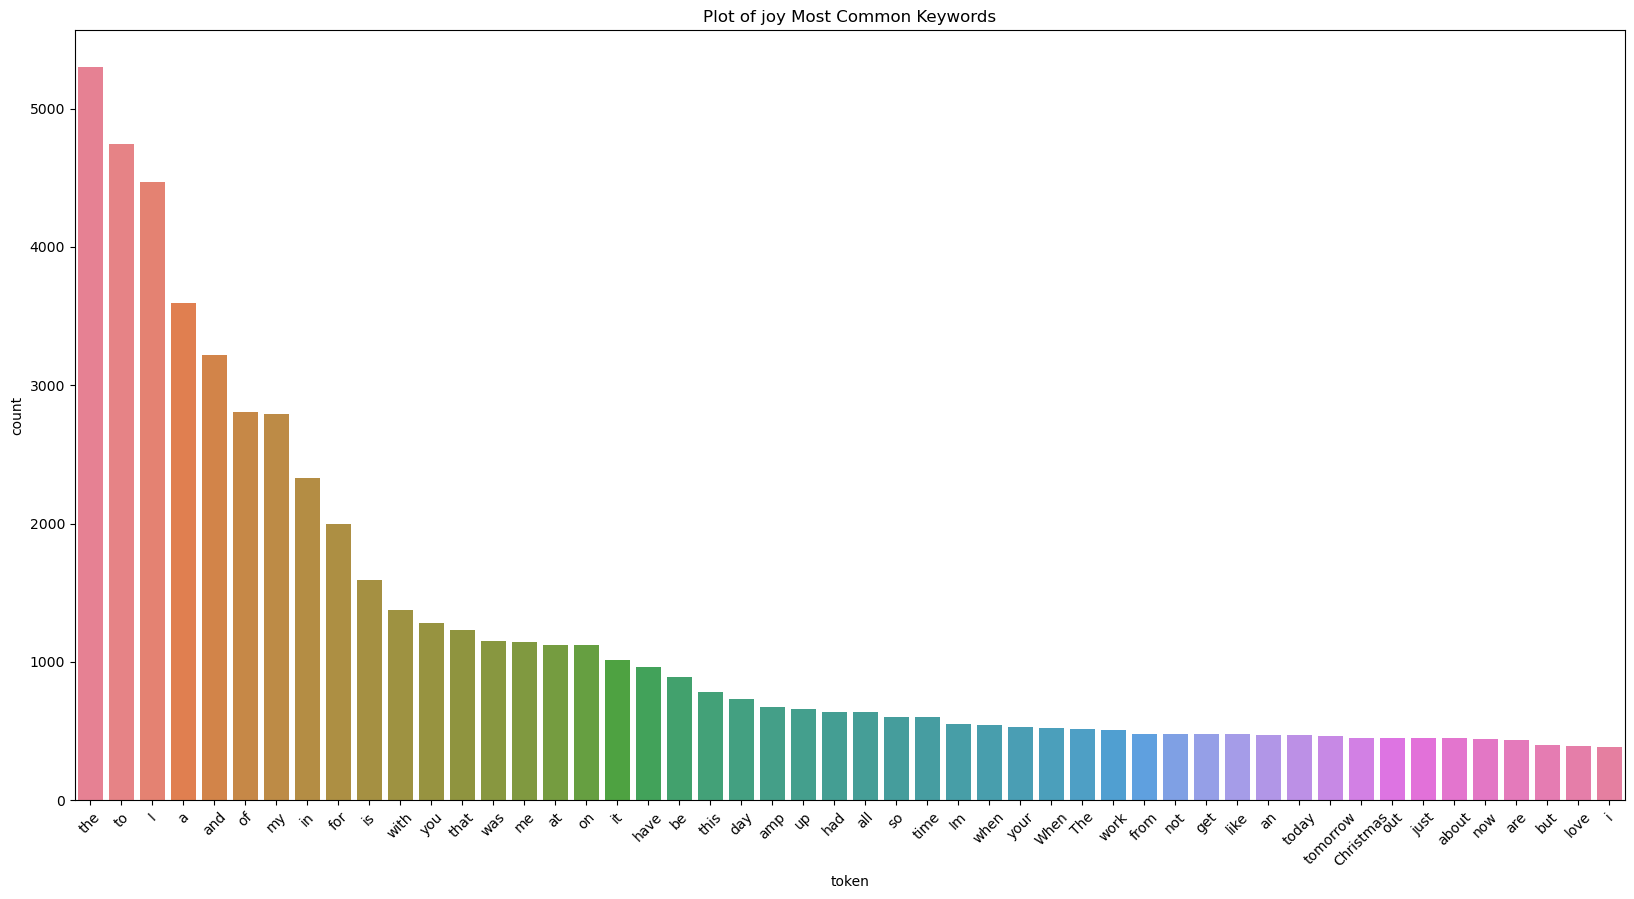

In [41]:
plot_most_common_words(keyword_joy,"joy")

In [42]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()

In [43]:
surprise_list

['maken Tip 2: Stop op een moment dat je het hele project wel ziet zitten Nu dus #derestkomtlaterwel',
 'En dan krijg je ff een cadeautje van een tweep #melike',
 '   Drummer Boy bij op verzoek van      : welke uitvoering van wie',
 'Haha of course I come home to a different house leave it to my parents to redo the entire downstairs without warning ',
 '  I reeeeeellllyyyyyyy need to tell you something but guess what My go phone is fucked up #gotohellmexicanphone',
 'another ending i almost pooped my pants at the end of last weeks crazy ending  #dEcodEd',
 'pop out amp roll across the floor ',
 'alleen nog even morgen cadootjes kopen in stadje en dan helemaal klaar ',
 ' Im not from this planet Im from one of the other planets that hold life amp are just being discovered ',
 'Good Morning  What Do You Have In Store For Me Today #EnjoyTheDay',
 'I almost forgot my hair was red until I looked in the mirror ',
 'Stopped today for gas in a small town to my an attendant came to tell me quot

In [44]:
# surprise document
surprise_docx=' '.join(surprise_list)

In [45]:
# extract keywords
keyword_surprise = extract_keywords(surprise_docx)

In [46]:
keyword_surprise

{'the': 1383,
 'to': 1219,
 'a': 1207,
 'I': 1063,
 'my': 826,
 'and': 801,
 'in': 751,
 'for': 601,
 'of': 592,
 'you': 562,
 'is': 548,
 'it': 400,
 'on': 399,
 'me': 392,
 'that': 383,
 'was': 367,
 'en': 299,
 'een': 294,
 'at': 265,
 'be': 257,
 'with': 251,
 'de': 251,
 'when': 247,
 'i': 244,
 'up': 241,
 'Im': 227,
 'out': 223,
 'have': 223,
 'just': 211,
 'this': 209,
 'your': 204,
 ':)': 201,
 'her': 176,
 'so': 175,
 'are': 170,
 'know': 165,
 'not': 162,
 'from': 161,
 'home': 160,
 'he': 157,
 'but': 154,
 'one': 154,
 'van': 153,
 'today': 150,
 'we': 149,
 'day': 144,
 'get': 142,
 'she': 142,
 'what': 139,
 'ik': 137}

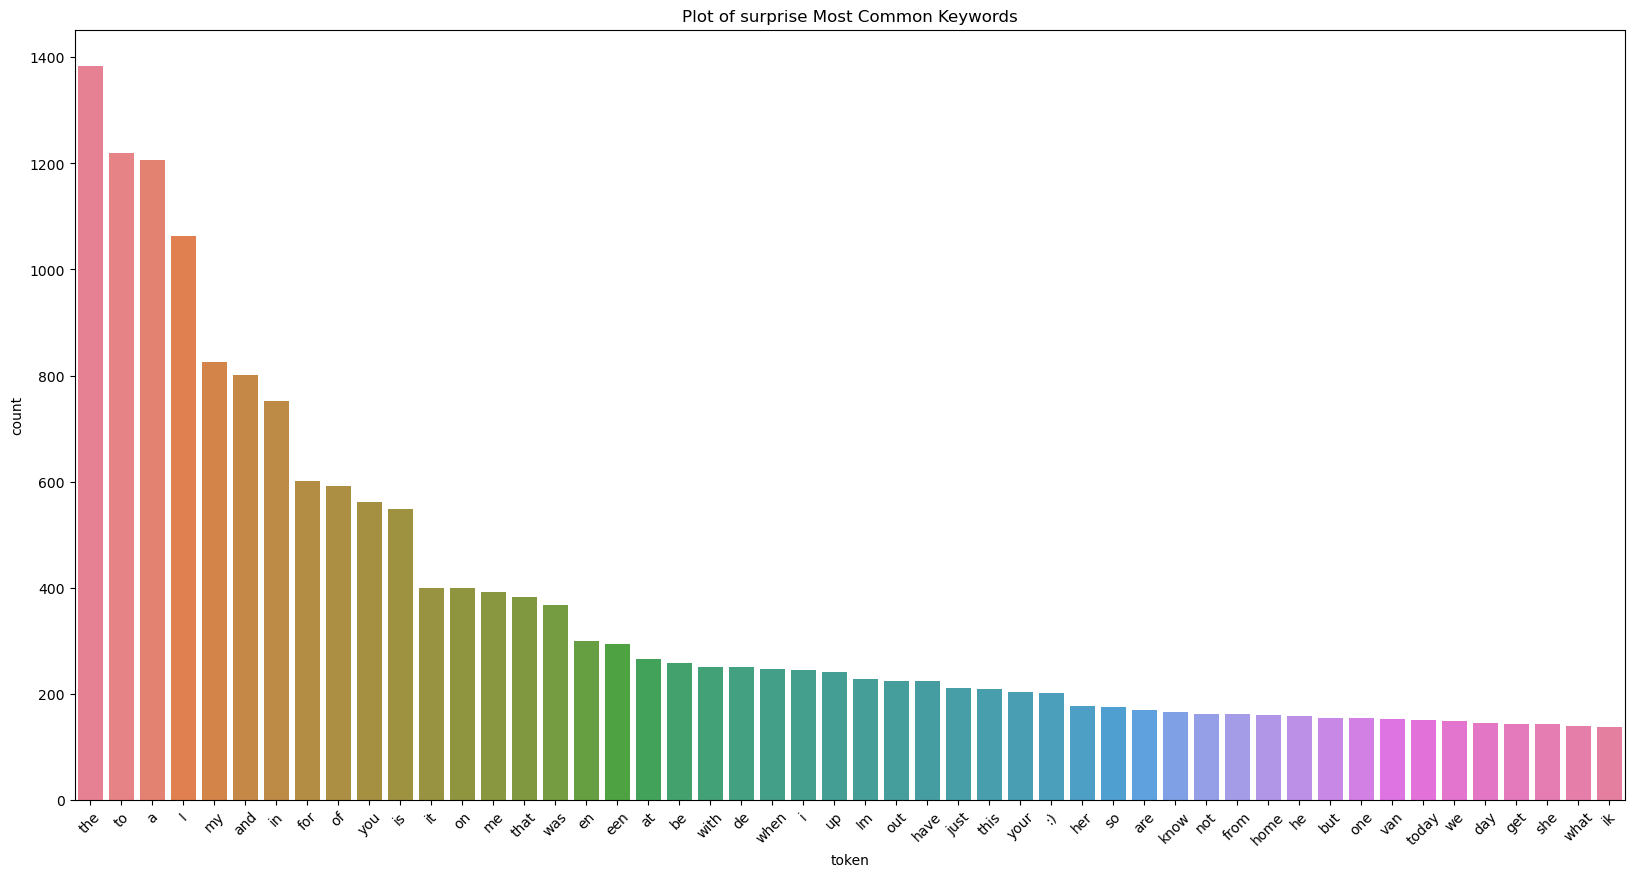

In [47]:
# plot
plot_most_common_words(keyword_surprise, "surprise")

In [48]:
!pip install wordcloud

In [49]:
### Word cloud
from wordcloud import WordCloud

In [50]:
def plot_wordcloud(docx):
    mywordcloud =WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

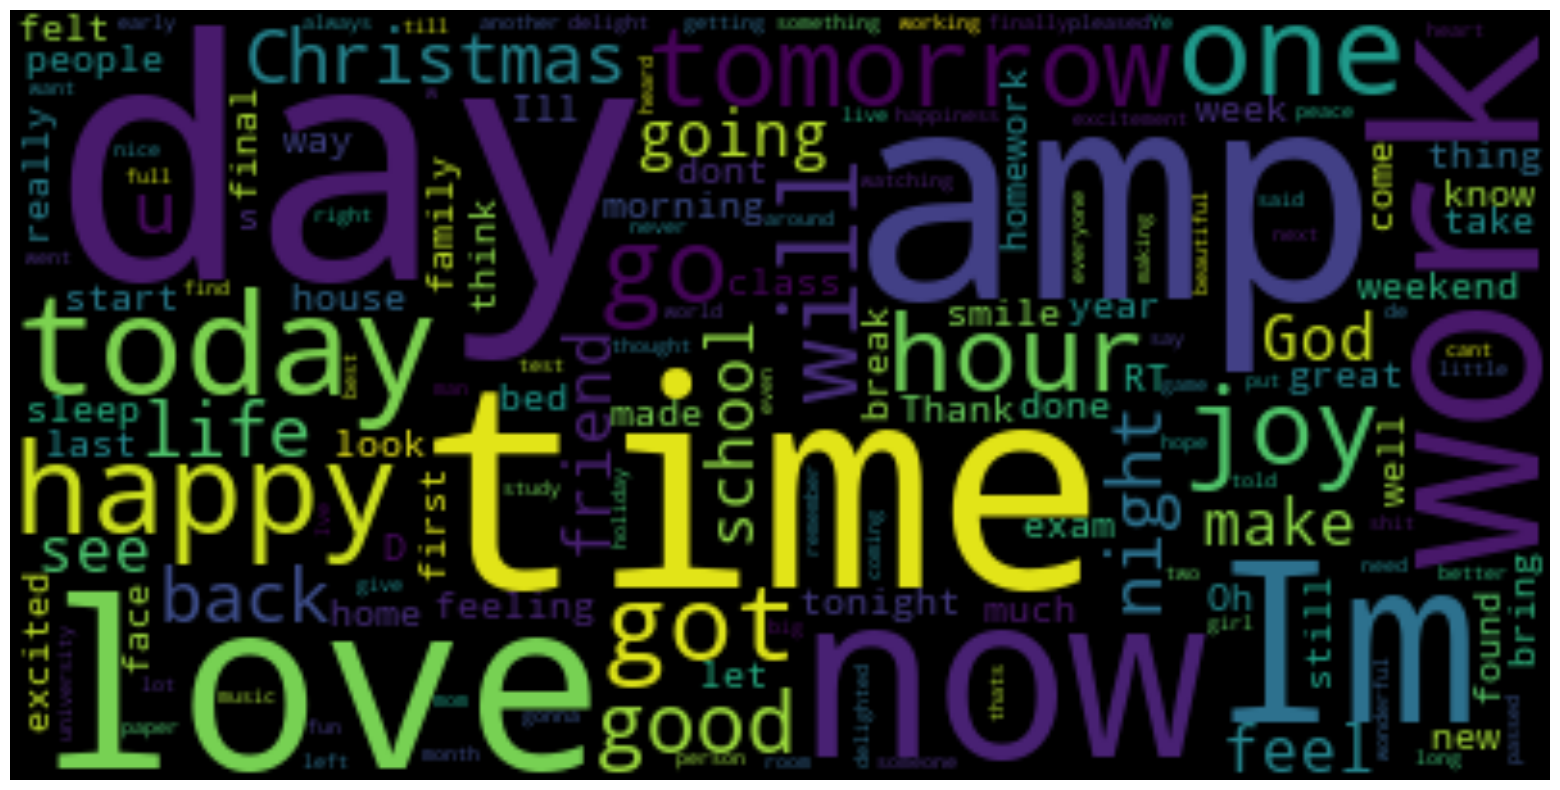

In [51]:
plot_wordcloud(joy_docx)

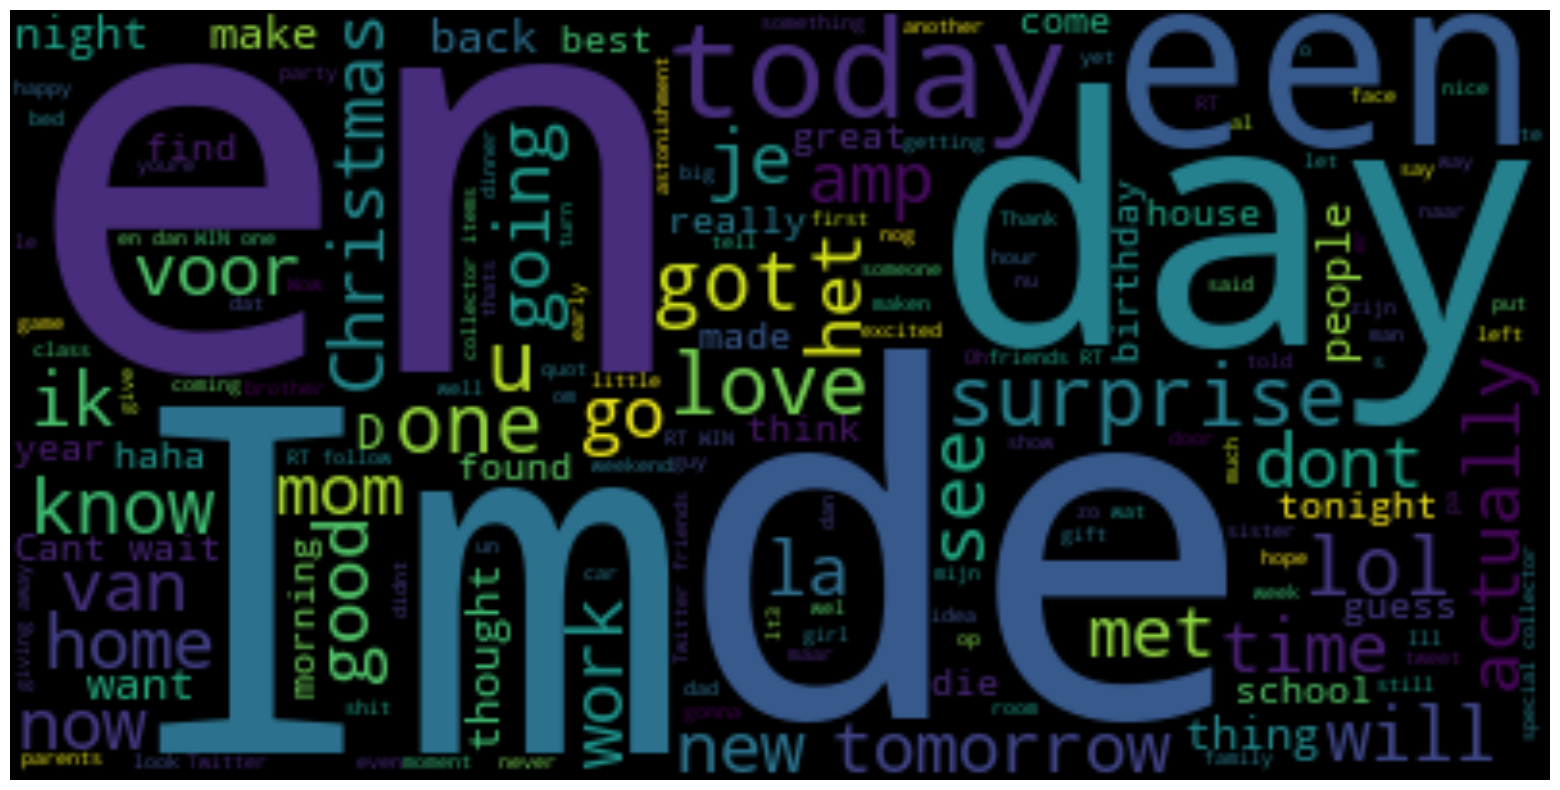

In [52]:
plot_wordcloud(surprise_docx)

#### Machine Learning for text classification
+ Naive Bayes
+ LogisticRegression
+ KNN
+ DecisionTree

#### Comapre with SparkNLP / NLU John Snows Lab

In [53]:
# Load ML pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay


In [54]:
# split our Dataset
from sklearn.model_selection import train_test_split

In [55]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return " ".join(text)

df['Clean_Text'] = df['Clean_Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Build Features From Our Text

In [164]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['Clean_Text'])

In [165]:
# Get Features by name
cv.get_feature_names_out()

array(['aa', 'aaa', 'aaaaaaaaaaaaa', ..., 'zz', 'zzap', 'zzzz'],
      dtype=object)

In [166]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, df['Emotion'], test_size=0.3, random_state=42)


### Build our Model

In [167]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [168]:
# Accuracy
# method 1
nv_model.score(X_test,y_test)

0.5660088139490324

In [169]:
# Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [170]:
y_pred_for_nv

array(['sadness', 'anger', 'sadness', ..., 'sadness', 'sadness',
       'sadness'], dtype='<U8')

### Make a Single Prediction
+ Vectorize our Text
+ Applied our model

In [171]:
sample_text = ["I love coding so much"]

In [172]:
vect = cv.transform(sample_text).toarray()

In [173]:
# Make Prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [174]:
# Check for the Prediction Probability(Percentage/Confidence score)
nv_model.predict_proba(vect)

array([[1.04680785e-02, 3.90957476e-04, 1.00974533e-01, 7.12939155e-01,
        3.71219361e-03, 1.34585633e-01, 2.39016353e-06, 3.69270591e-02]])

In [175]:
# Get all class for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [176]:
np.max(nv_model.predict_proba(vect))

0.7129391552354541

In [177]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{} , Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all
    

In [178]:
predict_emotion(sample_text,nv_model)

Prediction:joy , Prediction Score:0.7129391552354541


{'anger': 0.01046807854381516,
 'disgust': 0.00039095747647426905,
 'fear': 0.10097453328484084,
 'joy': 0.7129391552354541,
 'neutral': 0.0037121936133850115,
 'sadness': 0.13458563263075293,
 'shame': 2.390163533075393e-06,
 'surprise': 0.03692705905174358}

In [179]:
predict_emotion(["He hates running all day"],nv_model)

Prediction:joy , Prediction Score:0.8016088312796805


{'anger': 0.03700575819621701,
 'disgust': 0.0005815440502798667,
 'fear': 0.039495880485852945,
 'joy': 0.8016088312796805,
 'neutral': 0.0011963983770755815,
 'sadness': 0.07319605550520436,
 'shame': 1.1554843590077757e-06,
 'surprise': 0.04691437662133189}

#### Model Evaluation


In [180]:
# Classification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.63      0.50      0.56      1283
     disgust       0.50      0.03      0.06       292
        fear       0.75      0.58      0.66      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.31      0.02      0.04       675
     sadness       0.56      0.55      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.62      0.28      0.38      1181

    accuracy                           0.57     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.57      0.53     10438



In [181]:
# Confusion 
confusion_matrix(y_test,y_pred_for_nv)

array([[ 642,    0,   51,  359,    7,  211,    0,   13],
       [  39,   10,   33,  123,    0,   79,    0,    8],
       [  86,    5,  960,  360,    5,  165,    0,   64],
       [  73,    1,  101, 2848,   13,  206,    0,   69],
       [  24,    0,   17,  542,   16,   72,    0,    4],
       [  99,    0,   73,  693,    5, 1103,    0,   42],
       [  10,    0,    6,   15,    0,    4,    1,    0],
       [  48,    4,   45,  606,    6,  144,    0,  328]], dtype=int64)

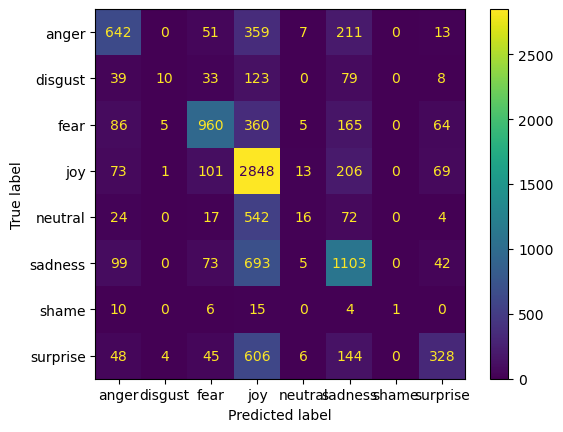

In [182]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nv_model, X_test, y_test)

### Save Model

In [183]:
import joblib

In [184]:
model_file = open("emotion_classifier_nv_model_16_june_2025.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

### Model Interpretation
+ Eli5
+ Lime
+ Shap

## Logictic Regression

In [185]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)

Logistic Regression Accuracy: 0.600402375934087


In [ ]:
print("Logistic Regression Accuracy:", lr_model.score(X_test, y_test))

#### Confusion Matrix and Classification Report

              precision    recall  f1-score   support

       anger       0.58      0.60      0.59      1283
     disgust       0.30      0.35      0.33       292
        fear       0.72      0.66      0.68      1645
         joy       0.72      0.61      0.66      3311
     neutral       0.42      0.84      0.56       675
     sadness       0.60      0.54      0.57      2015
       shame       0.85      0.97      0.91        36
    surprise       0.48      0.51      0.50      1181

    accuracy                           0.60     10438
   macro avg       0.58      0.64      0.60     10438
weighted avg       0.62      0.60      0.60     10438



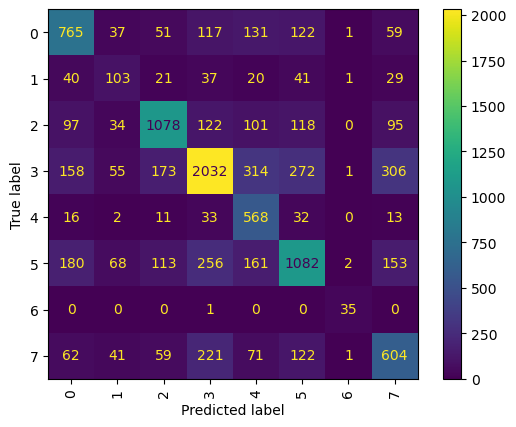

In [186]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(xticks_rotation='vertical')
plt.show()

In [187]:
# Accuracy
lr_model.score(X_test,y_test)

0.600402375934087

In [188]:
# Single Predict 
predict_emotion(sample_text,lr_model)

Prediction:neutral , Prediction Score:0.3309186714888508


{'anger': 0.03025953361425499,
 'disgust': 0.016087914993241192,
 'fear': 0.0724487842532247,
 'joy': 0.30527991164652285,
 'neutral': 0.3309186714888508,
 'sadness': 0.12204975957853963,
 'shame': 0.0016712890136613126,
 'surprise': 0.12128413541170459}

In [189]:
!pip install --upgrade eli5

In [190]:
import eli5

In [191]:
# Show the weight for each class/labels
eli5.show_weights(lr_model,top=20)

In [193]:
class_names = df['Emotion'].unique().tolist()

In [194]:
feature_names = cv.get_feature_names_out()

In [195]:
eli5.show_weights(lr_model,feature_names = feature_names,target_names = class_names)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': LinearSVC(max_iter=5000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")



Training Naive Bayes...
Naive Bayes Accuracy: 0.5660
Training Logistic Regression...
Logistic Regression Accuracy: 0.6245
Training SVM...
SVM Accuracy: 0.6050
Training Random Forest...
